In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf
import glob

classes = 17

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    return img

# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

def load_train():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

def load_test():
    X_train = []
    y_train = []
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

lx,ly = load_train()
ltx , lty = load_test()

x = np.array(lx)
y = np.array(ly)
ty = np.array(lty)
tx = np.array(ltx)
x = x.astype(float) / 255
tx = tx.astype(float) / 255

Using TensorFlow backend.


In [4]:
def sigmoid(x):
    sig = 1.0/(1+ np.exp(-x))
#     print(sig)
    return sig

def sigmoid_derivative(x):
    sig = x
#     sig = 1.0/(1+ np.exp(-x))
    return sig * (1.0 - sig)

In [3]:
def sigmoid(x): #relu
    return np.maximum(x, 0)

def sigmoid_derivative(x): #relu
#     if (x > 0.0).any():
#         return 1
#     else:
#         return 0.0
    return 1 * (x > 0)

In [5]:
inp = np.reshape(x,(270,900))
t_inp = np.reshape(tx,(80,900))

In [6]:
arr = np.empty((0,16), float)
for i in range(270):
    k = np.zeros(16)
    k = np.reshape(k,(1,16))
    k[0][y[i]] = 1
#     print(k)
    arr = np.append(arr, k, axis=0)

In [12]:
class feedForwardNetwork:
    def __init__(self, x, y):
        self.input  = x
        self.w      = np.random.rand(self.input.shape[1],inner) 
        self.v      = np.random.rand(inner,outer)                 
        self.y      = y
        self.output = np.zeros(outer)
        self.act_output = np.zeros(outer)
    def feedforward(self):
#         self.layer1 = (np.dot(self.input,self.w))
#         self.act_layer1 = sigmoid(self.layer1/max(self.layer1[0]))
#         self.output = (np.dot(self.act_layer1,self.v))
#         self.act_output = sigmoid(self.output/max(self.output[0]))
        self.layer1 = (np.dot(self.input,self.w))
        self.act_layer1 = sigmoid(self.layer1)
        self.output = (np.dot(self.act_layer1,self.v))
        self.act_output = sigmoid(self.output)
        
    def backPropagation(self):
        self.dv = 0.01* np.dot(self.act_layer1.T,(self.y-self.act_output)*sigmoid_derivative(self.output))
        self.dw = 0.01*np.dot(self.input.T,(np.dot((self.y - self.act_output) * sigmoid_derivative(self.output), self.v.T) * sigmoid_derivative(self.layer1)))
#                     np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        self.w += self.dw
        self.v += self.dv

In [23]:
nn.dv
# nn.output
# nn.act_layer1
# sigmoid_derivative(nn.act_layer1)

array([[5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845],
       [5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845],
       [5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845],
       ...,
       [5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845],
       [5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845],
       [5866.67550236, 4766.39180418, 6561.24731215, ..., 6634.65252961,
        7306.40298248, 5889.40692845]])

In [67]:
np.dot(sigmoid_derivative(nn.output/max(nn.output[0]))*(nn.y - nn.act_output),nn.v.T)
nn.v
np.dot(nn.layer1.T,sigmoid_derivative(nn.output/max(nn.output[0]))*(nn.y-nn.act_output))
nn.y-nn.act_output

array([[ 0.27351266, -0.71562024, -0.72339141, ..., -0.72489182,
        -0.72685861, -0.72144491],
       [ 0.27358869, -0.71555972, -0.72332826, ..., -0.72482984,
        -0.72681556, -0.72138802],
       [ 0.26925446, -0.71975629, -0.72763132, ..., -0.7291365 ,
        -0.7311539 , -0.72564478],
       ...,
       [-0.65122218, -0.64330494, -0.64897653, ..., -0.65005266,
        -0.65149677,  0.35241597],
       [-0.7101964 , -0.69980663, -0.70725378, ..., -0.70864084,
        -0.71050591,  0.29458176],
       [-0.62344795, -0.61680753, -0.62160515, ..., -0.62241668,
        -0.62368536,  0.37958336]])

In [19]:
sigmoid_derivative(np.dot(nn.layer1,nn.v)/269.15313533645804)

array([[0.16980372, 0.17238227, 0.17532871, ..., 0.17381198, 0.17077639,
        0.17168099],
       [0.16984458, 0.17242435, 0.17536336, ..., 0.17385473, 0.17082162,
        0.17171932],
       [0.16714063, 0.16981737, 0.17281308, ..., 0.17126441, 0.16817671,
        0.16907659],
       ...,
       [0.21225204, 0.2136347 , 0.21521518, ..., 0.21438869, 0.21276133,
        0.21324474],
       [0.18001993, 0.18233743, 0.18498006, ..., 0.18357988, 0.18085513,
        0.1816602 ],
       [0.22453042, 0.2255261 , 0.22660512, ..., 0.22603221, 0.22489927,
        0.22523286]])

In [103]:
sigmoid_derivative(nn.output)1

array([[0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       ...,
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193],
       [0.19661193, 0.19661193, 0.19661193, ..., 0.19661193, 0.19661193,
        0.19661193]])

In [24]:
inner = 100
outer = 16
nn = feedForwardNetwork(inp,arr)

for i in range(2):
    print("Epoch: "+str(i))
    nn.feedforward()
    nn.backPropagation()
#     if i % 100 == 0:
    print(nn.dw)
    print(nn.dv)
    print(nn.act_output)


nn.act_output

Epoch: 0
[[-1.84076879e+09 -2.09778712e+09 -1.63446198e+09 ... -1.37990665e+09
  -1.87107867e+09 -1.92286575e+09]
 [-1.85708259e+09 -2.11608490e+09 -1.64921923e+09 ... -1.39125748e+09
  -1.88694432e+09 -1.93921376e+09]
 [-1.89127140e+09 -2.15502951e+09 -1.67884418e+09 ... -1.41653297e+09
  -1.92162997e+09 -1.97492748e+09]
 ...
 [-1.66379859e+09 -1.88380692e+09 -1.46561206e+09 ... -1.24284509e+09
  -1.68123330e+09 -1.73027641e+09]
 [-1.66643687e+09 -1.88515797e+09 -1.46741478e+09 ... -1.24383605e+09
  -1.68184500e+09 -1.73222874e+09]
 [-1.66389182e+09 -1.88465955e+09 -1.46525107e+09 ... -1.24295980e+09
  -1.68201879e+09 -1.73076526e+09]]
[[4827.86809178 7420.42081639 6960.32396598 ... 5222.12092399
  6908.19946217 5951.93835347]
 [4827.86809178 7420.42081639 6960.32396598 ... 5222.12092399
  6908.19946217 5951.93835347]
 [4827.86809178 7420.42081639 6960.32396598 ... 5222.12092399
  6908.19946217 5951.93835347]
 ...
 [4827.86809178 7420.42081639 6960.32396598 ... 5222.12092399
  6908.19

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [ ]:
nn = feedForwardNetwork(inp,arr)
# np.dot(nn.input,nn.w).shape
nn.backPropagation()
# sigmoid(np.dot(nn.input,nn.w))
sigmoid_derivative(nn.output).shape

In [5]:
tx.shape

(80, 30, 30)

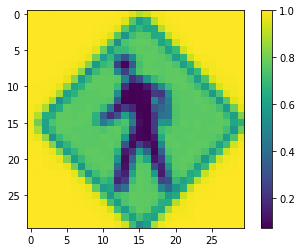

In [24]:
tx.shape
plt.figure()
plt.imshow(np.reshape(inp[0],(30,30)))
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [11]:
arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [124]:
nn.feedforward(t_inp[10],arr[10])

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [89]:
arr[140]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
sigmoid(np.dot(sigmoid(np.dot(t_inp[0],nn.w)),nn.v))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [62]:
inner = 5
outer = 2
X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
Y = np.array([[0,0],[0,1],[1,0],[1,1]])
tmp = feedForwardNetwork(X,Y)

for i in range(1500):
    tmp.feedforward()
    tmp.backPropagation()


tmp.output

array([[0.01618388, 0.01935707],
       [0.01727665, 0.98397978],
       [0.98182049, 0.01873056],
       [0.98731539, 0.98590599]])

In [57]:
tmp.output.shape

(4, 16)

In [52]:
dw

0

In [48]:
dw = 0
dv = 0

In [26]:
np.reshape(k,(2,1,6))

array([[[0, 1, 2, 3, 4, 5]],

       [[0, 1, 2, 3, 4, 5]]])

In [10]:
a = feedForwardNetwork(5,10)

In [20]:
input = np.array([[1,2,3],[2,1,3]])

In [31]:
input.shape

(2, 3)

In [40]:
w = np.random.rand(3,2)

In [46]:
w = np.array([[1,0],[0,1],[1,1]])

In [47]:
w

array([[1, 0],
       [0, 1],
       [1, 1]])

In [66]:
l1

array([[4, 5],
       [5, 4]])

In [128]:
t_inp[0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99215686, 0.96470588, 0.91372549,
       0.90588235, 0.92156863, 0.96862745, 0.99215686, 1.        ,
       1.        , 0.99607843, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99607843, 0.98823529, 0.90980392, 0.85098039,
       0.83529412, 0.78823529, 0.89803922, 0.97647059, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 0.98823529, 0.95686275, 0.84313725, 0.49411

In [129]:
nn.feedforward(t_inp[0],arr[0])

TypeError: feedforward() takes 1 positional argument but 3 were given

In [71]:
np.dot(l1.T,[1,2])

array([14, 13])

In [65]:
d

array([[20, 25],
       [25, 20]])

In [57]:
a = np.array([[1,2],[1,2]]) 
b = np.array([[11,12,2],[13,14,1]]) 
np.dot(a,b)

array([[37, 40,  4],
       [37, 40,  4]])